<a href="https://colab.research.google.com/github/emgifford/Post-Graduate-Certificate-in-Data-Science-and-Business-Analytics/blob/main/Project_1_Python_Foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Python Course/Project 1/foodhub_order.csv')
# returns the first 5 rows
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

*Data in each row corresponds to features of the order placed by a customer.*


*   The **order_id** columnn contains the unique order number of each instance placed by a customer. 
*   The **customer_id** column contains a number identifier of a particular customer of whom the order was placed by.  
*   The **restaurant_name** column contains the name of the restaurant the order was picked up from/the customer ordered from.
*   The **cuisine_type** column contains the type of cuisine of the order picked up/the customer ordered. 
*   The **cost_of_the_order** column contains the amount of money (numerical value) the order costed. 
*   The **day_of_the_week** column contains either a weekend or weekday value and indicates if the order was placed by the customer/picked up by the driver on either a weekend or weekday (Sat/Sun are weekends).
*   The **rating** column contains a numerical value (out of 5) or "not given" value showing the satisfaction as self-described by the customer.  
*   The **food_preparation_time** column contains the time in minutes it took the restaurant to make the food prior to delivery. 
*   The **delivery_time** column contains the time in minutes it took the delivery person from the time of order pick up to get to to the customer's location and drop off the delivery. 












### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations:


The DataFrame has 1898 rows and 9 columns. 
The DataFrame has 9 columns as mentioned in the Data Dictionary. 

In [ ]:
#there are 1898 rows and 9 columns 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
#There are both numerical (integer and decimal type values) along with string i.e. object type data 

#### Observations:


There are both numerical and object type data. 

*   All of the columns have 1898 observations. 
*   However, as seen in the df.head(), there were "not given" values in the **rating** section and has been indicated as an object. 
*   **restaurant_name, cuisine_type, day_of_the_week** are also objects; the rest are numerical in nature. 
*   Categorical data is in the object-type data. 





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()
#there are seemingly no missing values in the data, but see later down the code blocks for a conversion I did for rating section 
#I will convert "Not rated" to NaN for statistical analysis down the road. I chose not to use an average/median because there was a lot of "Not rated" 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
df.duplicated()
df.duplicated(['customer_id'])
#Checking for duplicated values just in case 
#it would make sense there are repeat customers--there is duplicated data, but that is okay 

0       False
1       False
2       False
3       False
4       False
        ...  
1893    False
1894    False
1895     True
1896     True
1897     True
Length: 1898, dtype: bool

In [ ]:
df.duplicated().sum()
#upon further review, no duplicated values, but probably will be once I deal with rating

0

In [ ]:
df['rating'] =df['rating'].replace(['Not given'], np.nan)
#Converting rating from string to float by replacing "Not given" as NaN 

In [ ]:
df['rating'] =df['rating'].astype(float)
#Now changing to a float just in case

In [ ]:
df.head()
#Checking to make sure it went through initially 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [ ]:
df.info
#NaN replacing worked 

<bound method DataFrame.info of       order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week  rating  \
0            Korean              30.75         Weekend     Na

In [ ]:
df.loc[df['rating'].isnull()==True]
#Checking that imputation went through again

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24


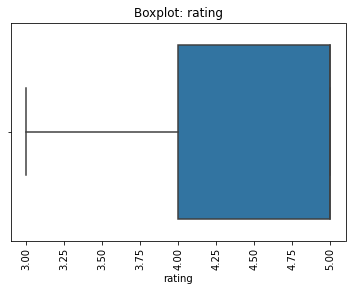

In [ ]:
plt.title("Boxplot: rating")
sns.boxplot(data=df, x='rating');
plt.xticks(rotation=90)
plt.show()
#No outliers, but data is skewed. Interesting.  
#But data is skewed, could use median to impute down the road--lots of missing data more than 25%

#### Observations:


There are seemingly no missing values or duplicate entries. 

However, one could consider "Not given" in rating as a missing value. 

I changed it to NaN for stat analysis and other types of analysis down the road. It is worth noting, that median could have been used to impute missing, but I chose to leave it be for now as NaN. 

Maybe there is a reason why people aren't rating--there's quite a bit in "No rating". 

For order 1477236, there seems to be messy data. The price is in the restaurant name. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
#It takes a min of 20 mins for the food to be prepared
#it takes an avg of 27.37 mins for the food to be prepared 
#It takes a max of 35 mins for the food to be prepared

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:


In [ ]:
#The order_id is in scientific notation, not sure how to change  

It takes a min of 20 mins for the food to be prepared

It takes an avg of 27.37 mins for the food to be prepared

It takes a max of 35 mins for the food to be prepared

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here

cat_cols=(['restaurant_name','cuisine_type','day_of_the_week','rating'])
for column in cat_cols: 
  print(df[column].value_counts())
  print("-" * 50)

#I know that I did a little more here than just the orders section, but I wanted to see some of the other values too. 
#it is notable that there are a LOT of not given compared to the other rated values. 


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------
5.0    588
4.0    386
3.0 

In [ ]:
df.info('rating')
#checking the total number of entries is 1898 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
588+386+188
#Total number of ratings that have values is below: 

1162

In [ ]:
1898-1162
#Subtracted to get the number of "Not given" or NaN ratings 

736

In [ ]:
#There are 736 rating that are not given, i.e. not rated. 

In [ ]:
#written more quickly: total orders minus rated orders sum (I just wanted to see a breakdown of the frequency of 5, 4, and 3 ratings)
1898-df['rating'].value_counts().sum()

736

#### Observations:


736 ratings are not given 

Of the ratings that are given, most at 5, second is 4 then 3:

but there are a lot of not given ratings.

### Exploratory Data Analysis (EDA)

**Univariate Analysis**

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Univariate Analysis of order_id**

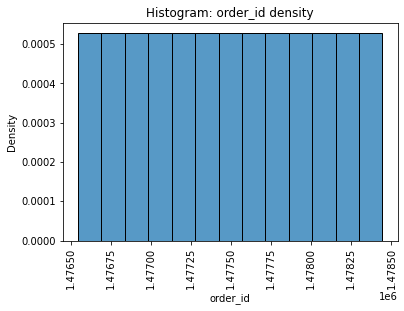

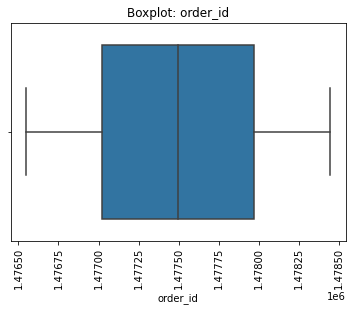

In [ ]:
#order_id univariate analysis

#order_id histogram 
plt.title("Histogram: order_id density")
sns.histplot(data=df, x='order_id', stat='density')
plt.xticks(rotation=90)
plt.show()

#order_id boxplot 
plt.title("Boxplot: order_id")
sns.boxplot(data=df, x='order_id');
plt.xticks(rotation=90)
plt.show()
#This doesn't really show as much as expected, with univariate analysis  




*  This data doesn't tell us much, very well distributed data 
*  No outliers, but again this data is more for assignment






**Univariate Analysis of customer_id**

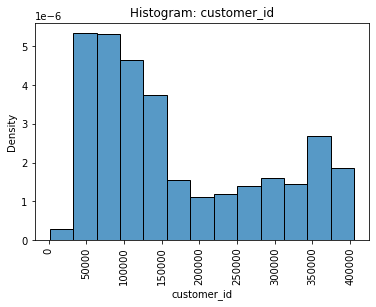

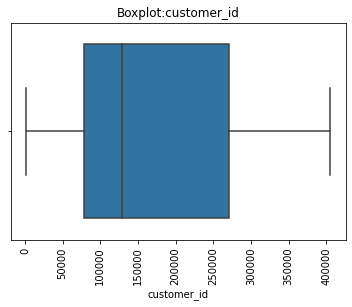

In [ ]:
#customer_id univariate analysis 

#customer_id histogram 
plt.title("Histogram: customer_id")
plt.xticks(rotation=90)
sns.histplot(data=df, x='customer_id', stat='density')
plt.show()

#customer_id boxplot 
plt.title("Boxplot:customer_id")
sns.boxplot(data=df, x='customer_id');
plt.xticks(rotation=90)
plt.show()



*   The media of the customer_id is around 12500
*   The data is slightly right skewed 
*   No outliers seen






In [ ]:
df['customer_id'].nunique()

1200

There's repeat customers 

**Univariate Analysis of restaurant_name**

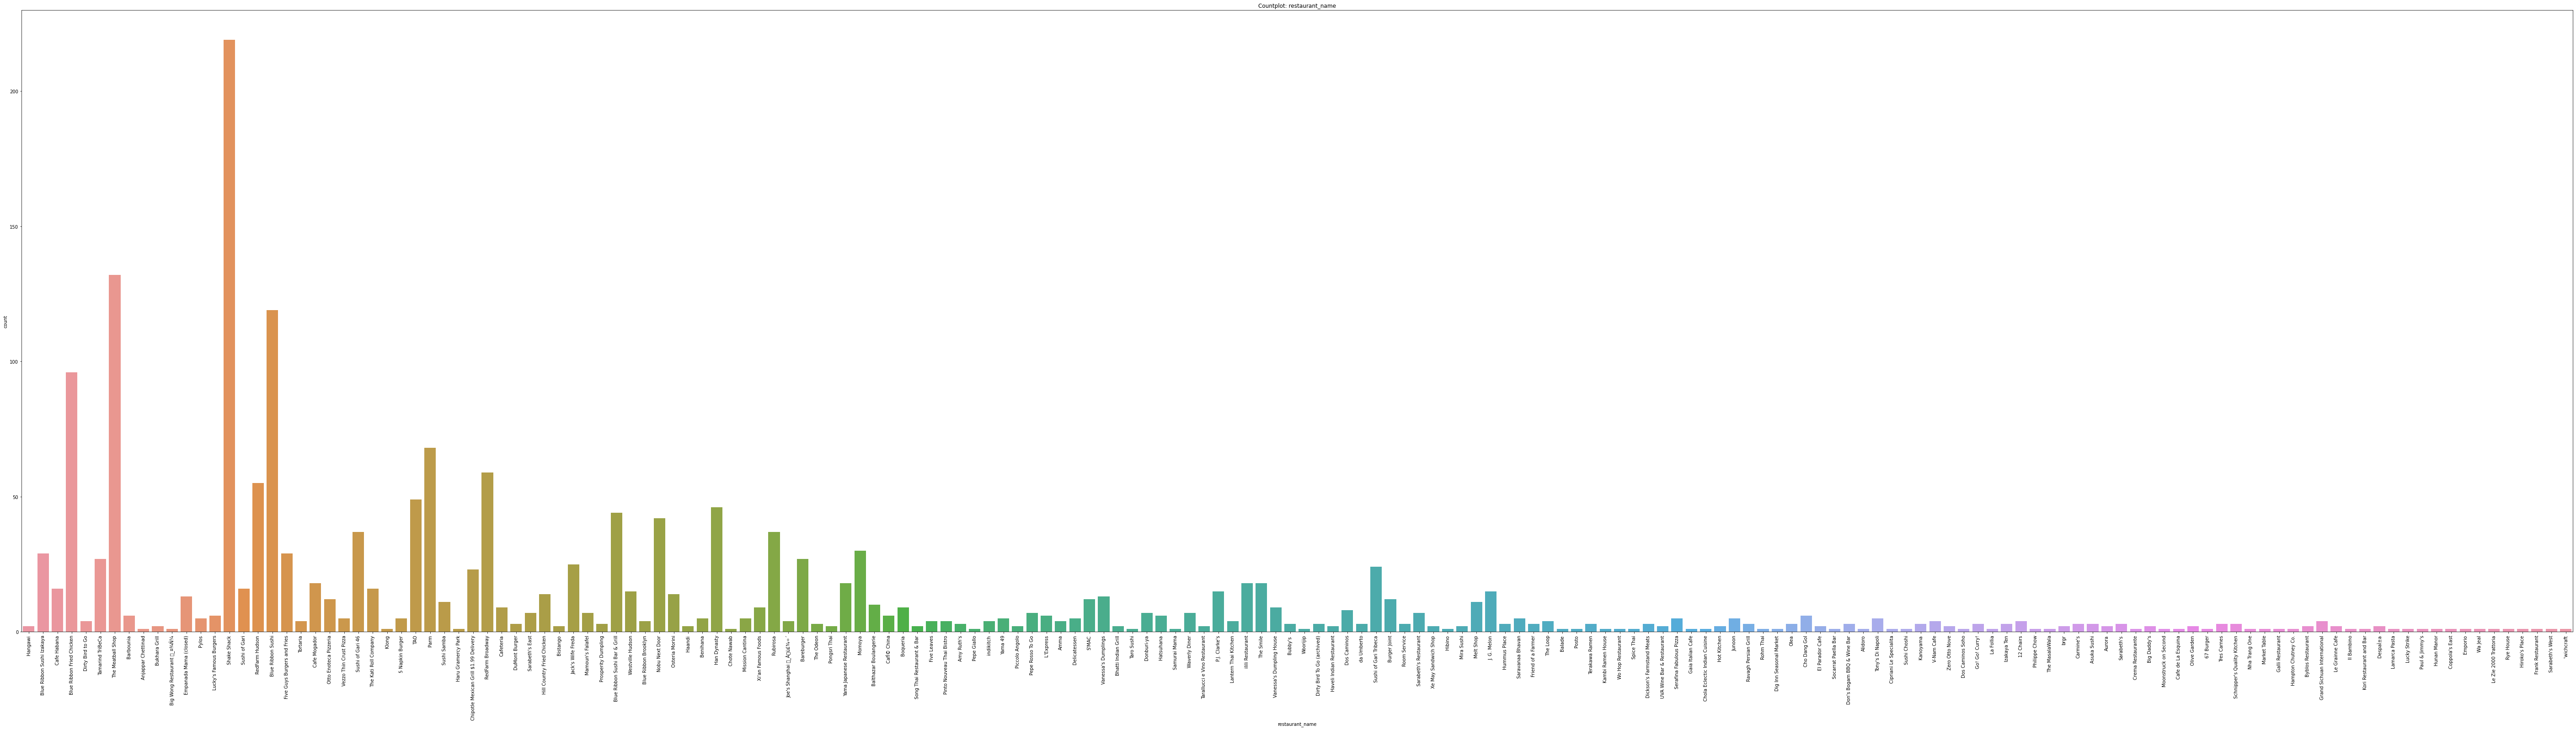

In [ ]:
#restaurant_name 
#Using a countplot because it's good for categorical data 
plt.figure(figsize=(100, 25))
#I changed the fig size because it was hard to see 
plt.title("Countplot: restaurant_name")
sns.countplot(data=df, x= 'restaurant_name');
plt.xticks(rotation=90);
plt.show()

#Getting rid of runtime warnings 
import warnings
warnings.filterwarnings('ignore')

#Shakeshake has a notably higher count than the rest 
#Ignore the text above the figure. 



*   Shake Shake has the highest count of orders
*   The Meatball Shop has the second highest count of orders 






In [ ]:
df['restaurant_name'].nunique()

178

178 unique restaurants

**Univariate Analysis of cuisine_type**

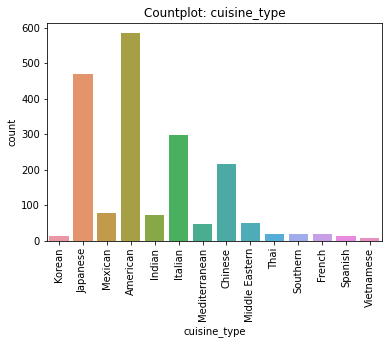

In [ ]:
#cuisine_type 

#Using a countplot because it's good for categorical data 
plt.title("Countplot: cuisine_type")
sns.countplot(data=df, x= 'cuisine_type');
plt.xticks(rotation=90);
plt.show()
#American has the highest countplot y values, Vietnamese appears to be the smallest 

#boxplot and histogram not used since value is categorical 



*   American has the highest orders, Vietnamese appears to be the smallest 




In [ ]:
df['cuisine_type'].nunique()

14

14 different types of cuisine

**Univariate analysis of cost_of_the_order**

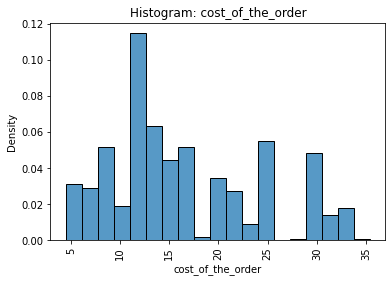

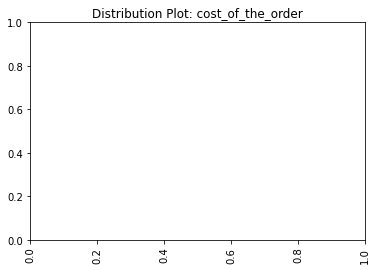

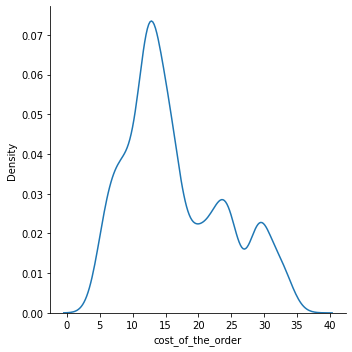

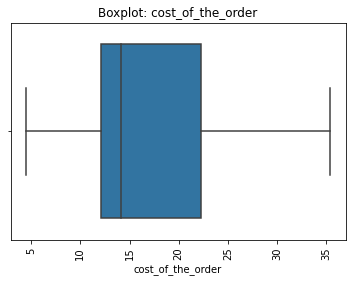

In [ ]:
#cost_of_the_order univariate analysis 
#numerical 

#cost_of_the_order histogram 
plt.title("Histogram: cost_of_the_order")
plt.xticks(rotation=90)
sns.histplot(data=df, x='cost_of_the_order', stat='density')
plt.show()

#cost_of_the_order displot 
plt.title("Distribution Plot: cost_of_the_order")
plt.xticks(rotation=90)
sns.displot(data=df, x='cost_of_the_order', kind='kde')
plt.show()
#data is slightly right skewed 

#cost_of_the_order boxplot 
plt.title("Boxplot: cost_of_the_order")
sns.boxplot(data=df, x='cost_of_the_order');
plt.xticks(rotation=90)
plt.show()



*   Data is slightly right skewed.
*   Majority or orders made cost less than 20, with the most frequent value at around 11-12. 
*   Maybe more customers prefer to order food that costs around 11-12 dollars? Would need to understand the types of individuals ordering these. 
Maybe FoodHub could to provide more data breakdown of socioeconomic status of individuals ordering to best cater to them. Could be students are ordering the most?   





**Univariate analysis of day_of_the_week**

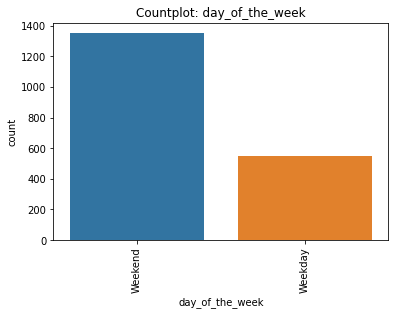

In [ ]:
#Using a countplot because it's good for categorical data 
plt.title("Countplot: day_of_the_week")
sns.countplot(data=df, x= 'day_of_the_week');
plt.xticks(rotation=90);
plt.show()
#There are more Weekend counts than Weekday

#boxplot and histogram and displot not used since value is categorical 



*   Weekend count appears greater than Weekday count by more than half 




**Univariate Analysis of rating **

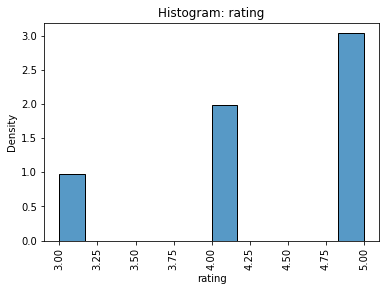

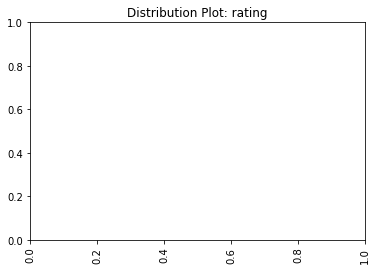

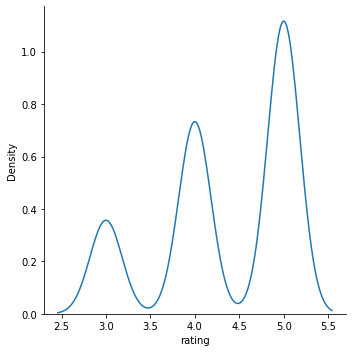

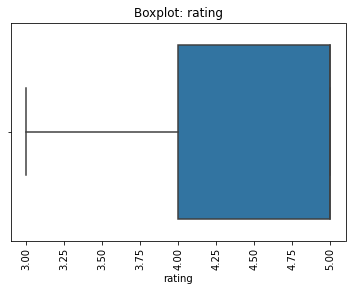

In [ ]:
#rating univariate analysis 
#numerical 

#rating histogram 
plt.title("Histogram: rating")
plt.xticks(rotation=90)
sns.histplot(data=df, x='rating', stat='density')
plt.show()

#rating displot 
plt.title("Distribution Plot: rating")
plt.xticks(rotation=90)
sns.displot(data=df, x='rating', kind='kde')
plt.show()
#data is slightly right skewed 

#rating boxplot 
plt.title("Boxplot: rating")
sns.boxplot(data=df, x='rating');
plt.xticks(rotation=90)
plt.show()



*   Rating data is highly left skewed
*   Did not include 'not given' info, could have effect on data
*   Around 4.3 appears to be the rating with the greatest frequency









**Univariate Analysis of food_prepration_time**

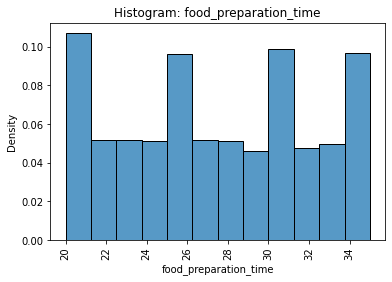

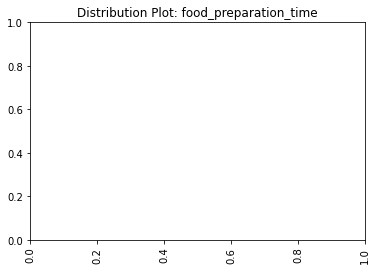

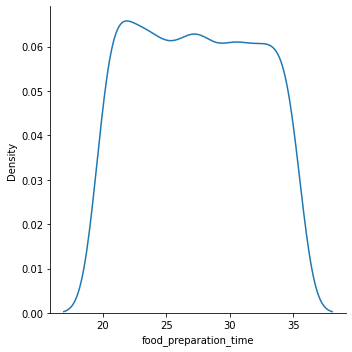

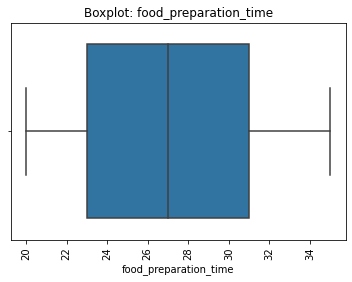

In [ ]:
#food_preparation_time univariate analysis 
#numerical 

#food_preparation_time histogram 
plt.title("Histogram: food_preparation_time")
plt.xticks(rotation=90)
sns.histplot(data=df, x='food_preparation_time', stat='density')
plt.show()

#food_preparation_time displot 
plt.title("Distribution Plot: food_preparation_time")
plt.xticks(rotation=90)
sns.displot(data=df, x='food_preparation_time', kind='kde')
plt.show()
#pretty uniformn distribution food_prep_time

#food_preparation boxplot 
plt.title("Boxplot: food_preparation_time")
sns.boxplot(data=df, x='food_preparation_time');
plt.xticks(rotation=90)
plt.show()



*  pretty uniform distribution of food preparation time, kde and box plot look very symmetrical



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#I also ran this code earlier.
#Shake Shake is at 219 orders, The Meatball Shop 132, Blue Ribbon Sushi 119, Blue Ribbon Fried Chicken 96 and Parm 68 
cat_cols=(['restaurant_name','cuisine_type','day_of_the_week','rating'])
for column in cat_cols: 
  print(df[column].value_counts())
  print("-" * 50)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------
5.0    588
4.0    386
3.0 

Top 5 restaurants in terms of orders: 

Shake Shack:                  219

The Meatball Shop:            132

Blue Ribbon Sushi:            119

Blue Ribbon Fried Chicken:     96

Parm:                          68

Obervations: These appear to be primarily American restaurants

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

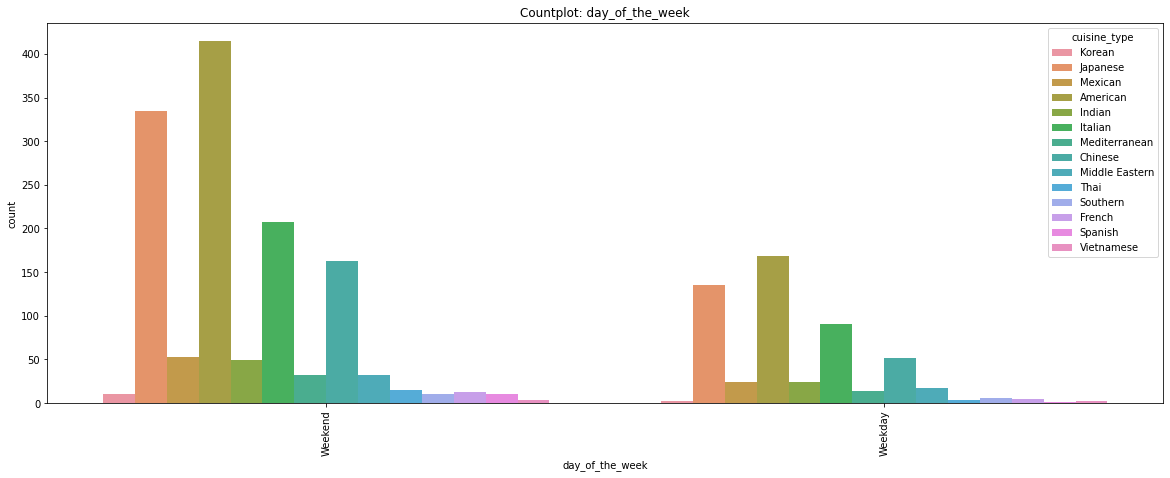

In [ ]:
#Using a countplot again, but with hue 
plt.figure(figsize=(20,7))
plt.title("Countplot: day_of_the_week")
sns.countplot(data=df, x= 'day_of_the_week', hue='cuisine_type');
plt.xticks(rotation=90);
plt.show()
#American is most popular on weekends 

#### Observations:
American is the most popular cuisine type order on weekends 

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
df.loc[df['cost_of_the_order']>20]
#555 is the answer, but need percentage 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5.0,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,NaN,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3.0,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4.0,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17


In [ ]:
555/1898

0.2924130663856691

In [ ]:
0.2924130663856691*100
#29.2413% of orders cost more than $20

29.24130663856691

#### Observations:
29.2413% of orders cost more than $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df.mean()

order_id                 1.477496e+06
customer_id              1.711685e+05
cost_of_the_order        1.649885e+01
rating                   4.344234e+00
food_preparation_time    2.737197e+01
delivery_time            2.416175e+01
dtype: float64

In [ ]:
#written in scientific notation for whatever reason, but the answer of mean for delivery_time is 
#24.16175 

#### Observations:
The delivery_time mean is 24.16175 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().idxmax
#I looked up how to get the max value of x

<bound method Series.idxmax of 52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64>

#### Observations:
Top most frequent customers that should get the discount 

customer_id 47440      :10 orders 

customer_id 83287      :9 orders 

customer_id 250494     :8 orders 

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Multivariate analysis (starting with numerical values)**

**Correlation by Heatmap**

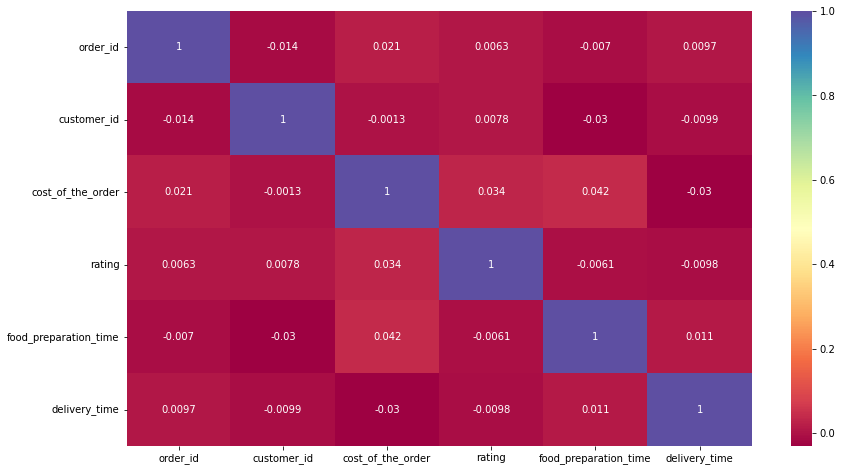

In [ ]:
#checking for correlation among numnerical variables
#numerical values as seen in the stat summary  
num_var = ['order_id', 'customer_id', 'cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
corr =df[num_var].corr()

plt.figure(figsize= (14, 8))
sns.heatmap(corr, annot=True, cmap="Spectral")
plt.show()


There is no significant correlation of the numerical values of order_id,
customer_id, cost_of_the_order,	rating,	food_preparation_time,	delivery_time

**Pairplot**

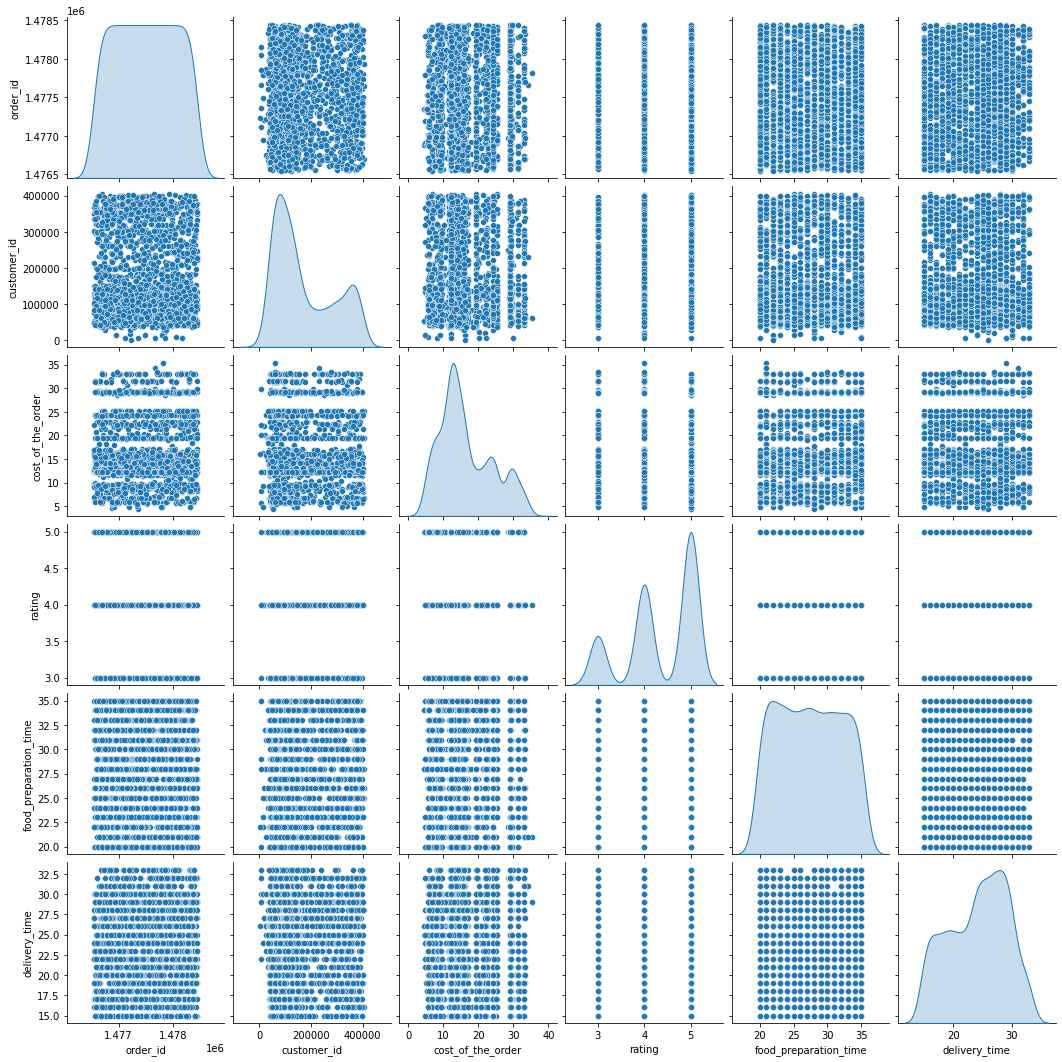

In [ ]:
#using a pairplot as well 
sns.pairplot(data=df[num_var], diag_kind='kde')
plt.show()

No significant correlations, same as heatmap 

**cuisine type and rating**

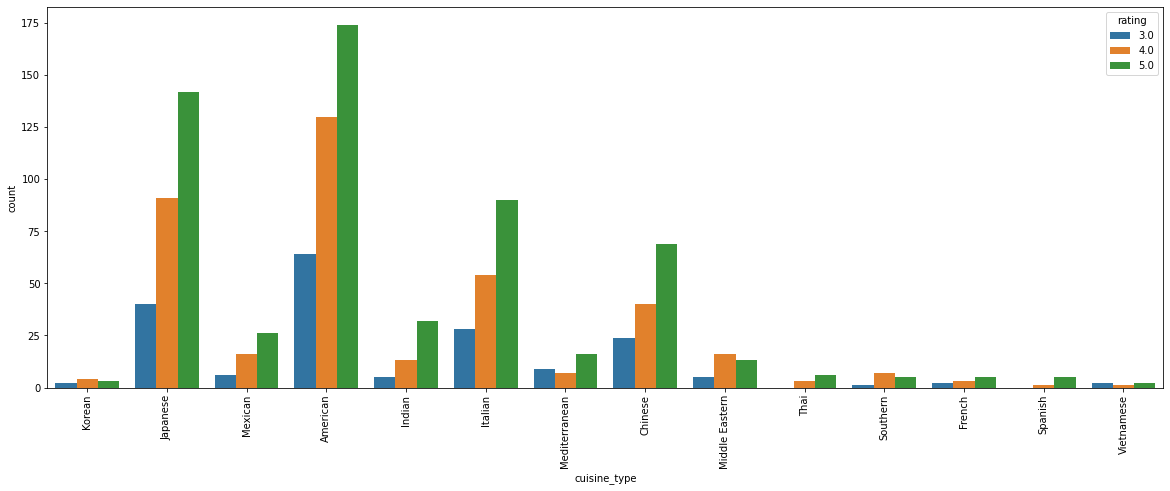

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x= 'cuisine_type', hue='rating');
plt.xticks(rotation=90);
plt.show()

**cuisine, rating: weekends/weekdays**

<Figure size 1440x504 with 0 Axes>

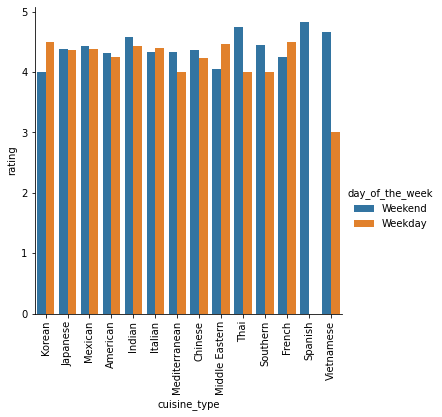

In [ ]:
plt.figure(figsize=(20,7))
sns.catplot(data=df, x= 'cuisine_type', y= 'rating', hue='day_of_the_week', kind='bar', ci=None);
plt.xticks(rotation=90);
plt.show()


*   For some restaurants such as Spanish and Vietnamese, higher ratings are given on weekends. 
*   However, data all in all doesn't seem to show one way or another if higher or lower ratings are given on a weekend or weekday. 



**cuisine and cost of the order**

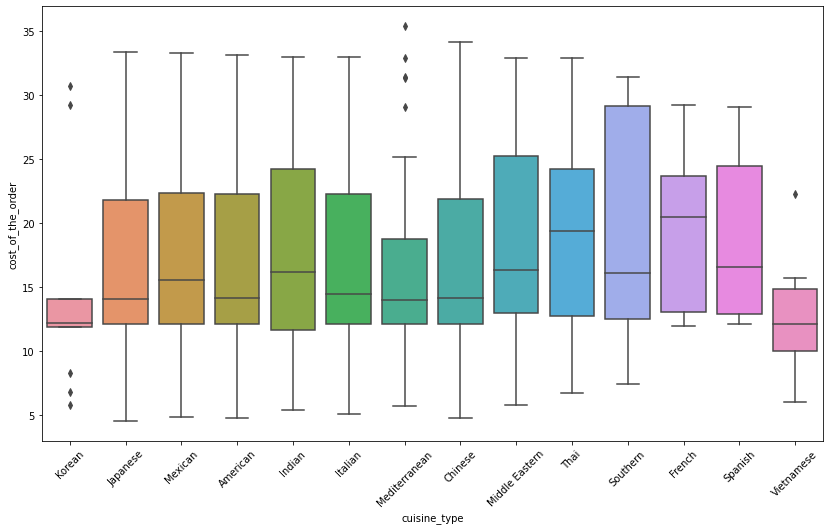

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.show()

 


*   There are some outliers in the data for Korean, Mediterranean, and Vietnamese






**cuisine and food preparation time** 

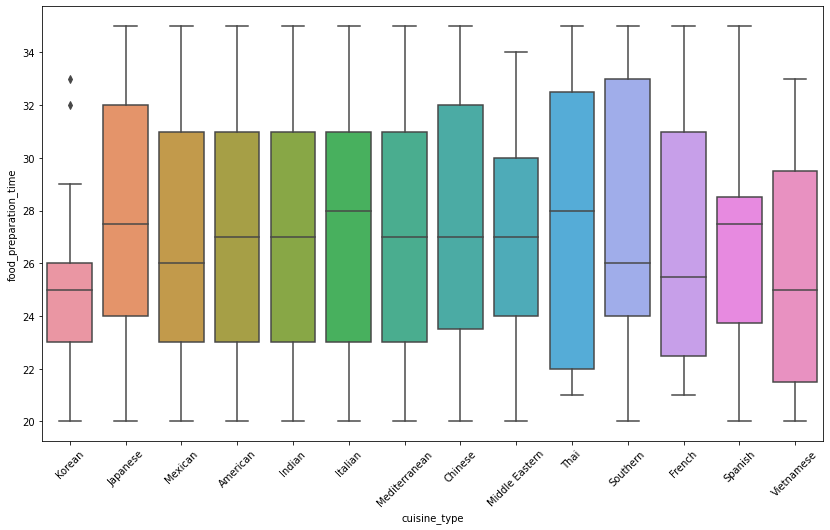

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=45)
plt.show()



*   There are outliers for Korean cuisine and food prep time 




**day of the week and delivery time**

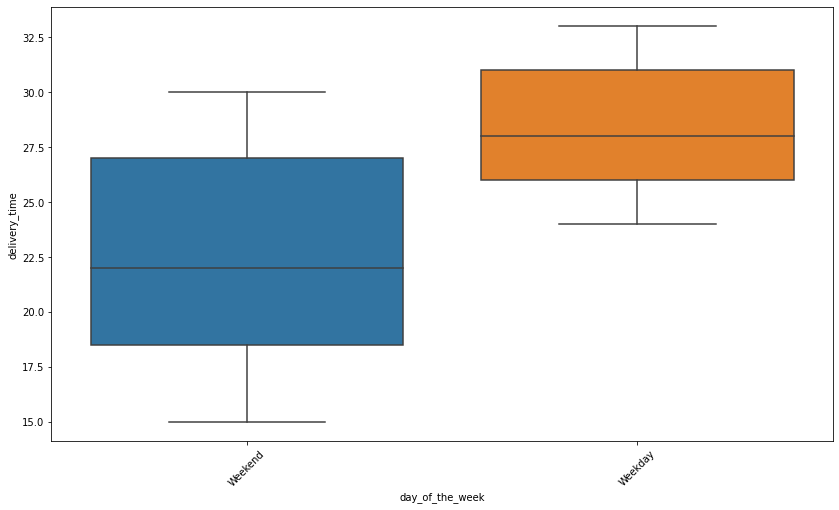

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.xticks(rotation=45)
plt.show()



*   Delivery time generally takes longer on the weekdays than weekends.






**Restaurants with the most cost** 

Shake Shake, The Meatball Shop, and Blue Ribbon Sushi are generating the most money. This makes sense as they have the most orders too as explored earlier. 
The top money-makers are often American restaurants. 

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head()

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

**delivery time and rating**

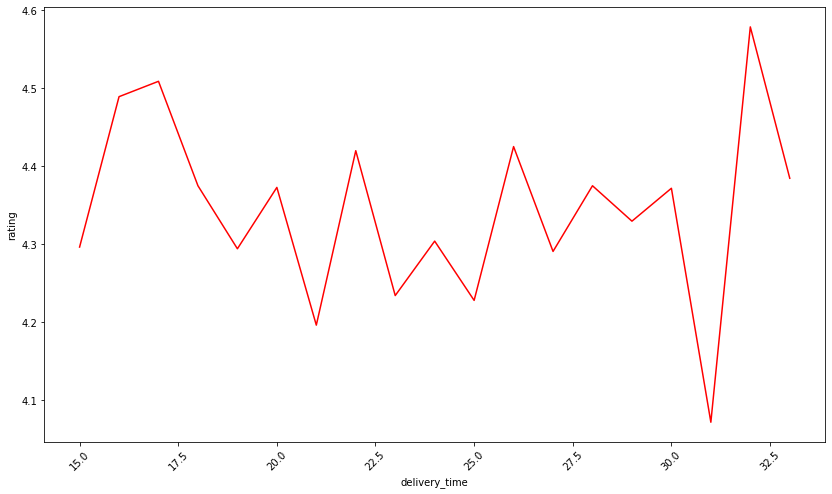

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(x='delivery_time', y='rating', data=df, ci=None, color='red')
plt.xticks(rotation=45)
plt.show()



*   The doesn't seem to be a clear indication of food prep time on rating, data is all over the place, maybe there are other factors to consider. 










**rating and food preparation time**

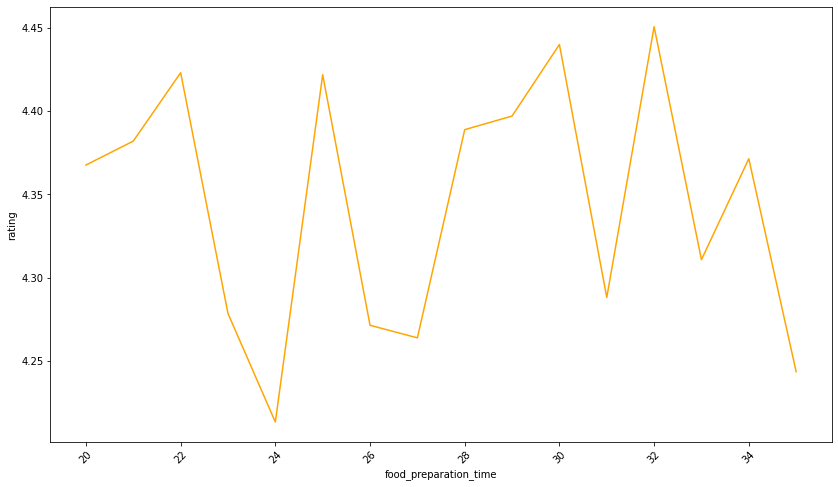

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(x='food_preparation_time', y='rating', data=df, ci=None, color='orange')
plt.xticks(rotation=45)
plt.show()



*    There doesn't seem to be a clear indication of food prep time on rating, data is all over the place, maybe there are other factors to consider. 






### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df.count()

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1162
food_preparation_time    1898
delivery_time            1898
dtype: int64

In [ ]:
#First, filtering the dataframe to get restaurant and rating count > 50
df_counts = df.groupby(['restaurant_name'])['rating'].count()
df_counts_new = df_counts[df_counts >50].sort_values(ascending = False)

#Next filtering the dataframe to get restaurant's with ratings with a mean >4 
df_means_new = df.groupby(['restaurant_name'])['rating'].mean()
df_means_new_4 = df_means_new[df_means_new > 4]

#Creating sets for each of the filtered dataframes 
rest_cnt_gr_50 = set(df_counts_new.index)
means_new_4 = set(df_means_new_4.index)

#Checking to make sure the sets went through 
print(rest_cnt_gr_50)
print(means_new_4)

{'Shake Shack', 'Blue Ribbon Fried Chicken', 'The Meatball Shop', 'Blue Ribbon Sushi'}
{'Galli Restaurant', 'The Loop', 'Saravanaa Bhavan', 'Blue Ribbon Sushi Izakaya', 'Blue Ribbon Sushi', "Schnipper's Quality Kitchen", 'Prosperity Dumpling', "Big Daddy's", 'Ravagh Persian Grill', "Sarabeth's Restaurant", 'ilili Restaurant', 'Hunan Manor', 'Han Dynasty', 'Shake Shack', "L'Express", 'Lantern Thai Kitchen', 'Hummus Place', 'Amma', 'Chola Eclectic Indian Cuisine', 'Parm', 'Balthazar Boulangerie', 'Xe May Sandwich Shop', 'Delicatessen', "P.J. Clarke's", 'Philippe Chow', 'Tamarind TriBeCa', 'Cafe Mogador', "S'MAC", 'Westville Hudson', "Bubby's ", 'RedFarm Hudson', 'Balade', 'Boqueria', 'UVA Wine Bar & Restaurant', 'Blue Ribbon Sushi Bar & Grill', 'Mission Cantina', 'Cafe de La Esquina', 'The Meatball Shop', 'Benihana', 'Vezzo Thin Crust Pizza', 'Yama 49', 'DespaÌ±a', 'Dos Caminos', 'Pinto Nouveau Thai Bistro', 'Bareburger', 'Blue Ribbon Fried Chicken', 'Hot Kitchen', 'Kanoyama', 'Sushi of 

In [ ]:
#Using an intersection like the middle of a venn-diagram to achieve the restaurant names that meet the promo criteria 
print(rest_cnt_gr_50 & means_new_4)

{'Shake Shack', 'Blue Ribbon Fried Chicken', 'The Meatball Shop', 'Blue Ribbon Sushi'}


#### Observations:


*   Shake Shake, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken meet the promo criteria. 







### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#First filter restaurants with orders > 20 
#and statement 

# First filtered restaurants with orders >20 and got the sum and then multiplied by .25 (25%) to get the total net for those orders meeting the criteria 
print(df[df['cost_of_the_order'] >20]['cost_of_the_order'].sum()*.25)
#11066.182499999999 is the revenue for the cost_of_the_order greater than 20, but I added the 25% 

3688.7275


In [ ]:
#Finding orders greater than 5 and less than 20 and got the sume and then multiplied by .15(15%) to get the total net for those orders 
#print(df[(df['cost_of_the_order'] >5) & (df['cost_of_the_order'] >20])]) #['cost_of_the_order'].sum()*.15)
print(df[(df['cost_of_the_order'] >5) & (df['cost_of_the_order'] <20)]['cost_of_the_order'].sum()*.15)
#2477.5755000000004

2477.5755000000004


In [ ]:
3688.7275+2477.5755000000004
#The revenue of these percentages is 6166.303

6166.303

#### Observations:
The net revenue of the 6,166.303 dollars-- 
$6,166.30 if rounded. 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
#Need to add values of food delivery and food prep time to get total time and add to column 
df['total_time_for_orders']=df['food_preparation_time'] + df['delivery_time']
df_greater_than_60=(df['total_time_for_orders']>60)
df_greater_than_60.sum()
#There are 200 orders that take longer than 60 mins, will take percentage of all of the orders and multiply by 100 

200

In [ ]:
df.info()
#1898 orders
#Used total number of data rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   total_time_for_orders  1898 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 148.4+ KB


In [ ]:
#Caluculating percentage of orders that are taking longer than 60 mins 
(200/1898)*100

10.537407797681771

#### Observations:
Around 10.537407797681771% of orders take longer than 60 mins 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df['weekend_delivery_time']=df[df['day_of_the_week'] == 'Weekend']['delivery_time']
df['weekday_delivery_time']=df[df['day_of_the_week'] == 'Weekday']['delivery_time']

In [ ]:
print(df['weekend_delivery_time'].mean())
print(df['weekday_delivery_time'].mean())

22.4700222057735
28.340036563071298


In [ ]:
#The mean of weekend_delivery_time is 22.47 mins 
#The mean of weekday_delivery_time is 28.34 mins 

#### Observations:


*   The mean of weekend delivery time is 22.47 mins 
*   The mean of weekday delivery time is 28.34 mins
*   The mean of weekday delivery time is greater than weekend_delivery, maybe due to traffic?






 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Analysis of this dataset included nearly 1,900 orders in the New York area from the FoodHub app to include aspects of rating, cuisine type, and more. The main feature of interest involves cuisine type and rating.

Although there is a need for more rating data as only 736 of the around 1,900 orders were actually rated, of the data provided: 

*   American cuisine appears to be the most frequently rated cuisine with the most 5.0 ratings compared to other cuisine types.
*   Japanese cuisine has the second most rating counts followed by the second most 5.0 ratings overall. 
*   Italian has the third most rating counts and 5.0 ratings (Chinese is a close fourth with similar data to Italian). 
*   Korean, Thai, Southern, French, Spanish, and Vietnamese do not have much data on rating. 
* For some restaurants such as Spanish and Vietnamese, higher ratings are given on weekends. 
*   However, data all in all doesn't seem to show one way or another if higher or lower ratings are given on a weekend or weekday.
*   There is not a significant indication that delivery time or food preparation time by themselves have a correlation with rating; 
*   Of rating types, 5.0 is the most frequent. 









### Recommendations:
More rating data is needed in general.




*   5.0 ratings are the most frequent across cuisine types/orders. 
*   American cuisine is the most popular cuisine with the most frequent and highest ratings–this cuisine type should be considered a cuisine of interest and more thoroughly explored in regards to customer satisfaction. 
*   American cuisine could be viewed as a broad category--perhaps further labels are needed to determine specifically what type of American food is preferred and more highly rated (i.e American-Asian fusion, American-Fastfood, etc.) 
*   Rating on specific days of the week could be explored beyond just weekend and weekday categories (i.e. exploration could be conducted on Mondays, Tuesdays, Sundays, etc. to see the day of the week with the most ratings and which cuisine types they come from).
*   Rating in regards to delivery time and food preparation time added together should be explored in the future. 








---